## Analysis Results Quantum Chemistry

### Adapt-VQE vs U

#### Imports

In [21]:
from src.hartree_fock_library import HartreeFock,HartreeFockVariational
from src.hamiltonian_utils import get_twobody_nuclearshell_model,FermiHubbardHamiltonian,SingleParticleState
import numpy as np
import torch
from typing import Dict,List
from src.qml_models import AdaptVQEFermiHubbard
from src.qml_utils.train import Fit
from src.qml_utils.utils import configuration
import matplotlib.pyplot as plt
from tqdm import tqdm
import argparse
import os

#### Data

In [23]:

us=np.linspace(0,4,8)
t=1.0
size_a=6
size_b=6
nparticles_a=3
nparticles_b=3

es=[]
egs=[]
op_numbers=[]
histories={}
# Loop through each .npz file
for r in us:
    
    # Load the .npz file
    data=np.load(f'data/quantum_chemistry/adaptive_vqe_results_tol_1e-05_t_{t}_u_{r:.2f}_size_{size_a}_nparticles_{nparticles_a}_{nparticles_b}.npz',allow_pickle=True)
    es.append(data['energy'])
    print(data['energy'],data['exact_energy'])
    egs.append(data['exact_energy'][0])
    op_numbers.append(len(data['operators_info']))
    histories[r]=data['history']
    if r==us[-1]:
        print(data['operators_info'])
    
es=np.asarray(es)
egs=np.asarray(egs)
op_numbers=np.asarray(op_numbers)

-4.13273109929661 [-4.1327311]
-8.126438536041372 [-8.12777558]
-13.245397420145942 [-13.24576592]
-19.211898957968913 [-19.21223292]
-25.600340188927618 [-25.60085681]
-32.17335590384622 [-32.19391442]
-38.898392415697174 [-38.90204906]
-45.67403017675443 [-45.67687043]
[(3, 9, 3, 10) (3, 9, 4, 9) (1, 6, 1, 7) (0, 7, 1, 7) (4, 11, 5, 11)
 (5, 10, 5, 11) (0, 11, 5, 11) (5, 6, 5, 11) (2, 7, 2, 8) (1, 8, 2, 8)
 (1, 9, 3, 9) (3, 7, 3, 9) (0, 9, 3, 9) (3, 6, 3, 9) (2, 6, 2, 8) (0, 2)
 (0, 10, 5, 11) (4, 6, 5, 11) (3, 9, 4, 6) (3, 9, 4, 7) (1, 11, 5, 11)
 (7, 11) (1, 10, 3, 9) (0, 10, 3, 9) (0, 7, 3, 9) (2, 8, 4, 8)
 (1, 10, 5, 11) (8, 10) (1, 6, 5, 11) (1, 6, 2, 8) (1, 6, 3, 9)
 (4, 7, 5, 11) (1, 10, 2, 8) (2, 8, 4, 7) (1, 6, 2, 11) (1, 6, 2, 9)
 (1, 6, 3, 8) (3, 8, 4, 6) (1, 10, 2, 9) (3, 11, 4, 6) (3, 8, 4, 7)
 (1, 10, 2, 11) (0, 7, 5, 11) (0, 10, 3, 8) (1, 10, 3, 8) (2, 9, 4, 7)
 (2, 9, 4, 6) (3, 11, 4, 7) (2, 8, 4, 6) (0, 1, 2, 5) (2, 11, 4, 7)
 (1, 10, 3, 11) (2, 7, 2, 8) (4, 7, 5, 9)

#### Analysis of the energy

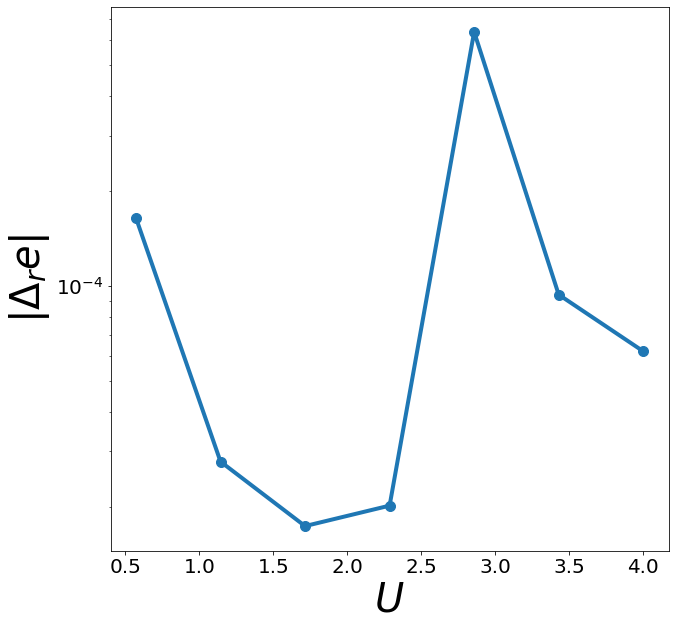

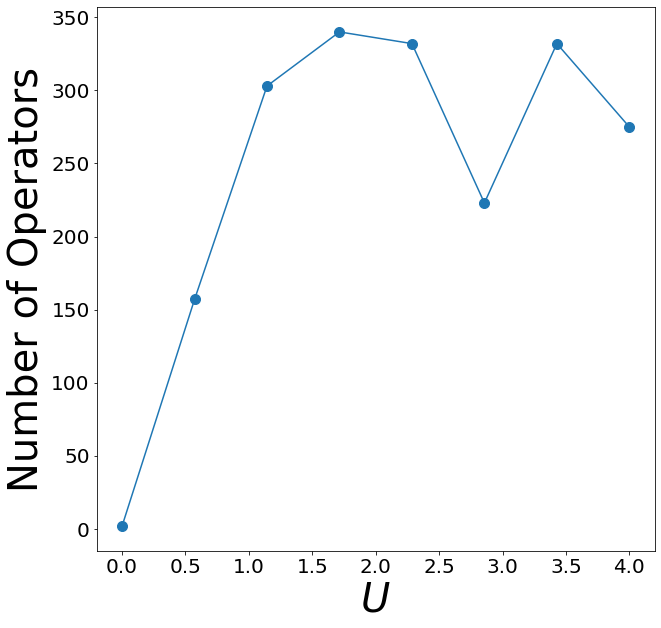

In [24]:
plt.figure(figsize=(10,10))
plt.plot(us[1:],np.abs((es-egs)/egs)[1:],linewidth=4)
plt.scatter(us[1:],np.abs((es-egs)/egs)[1:],s=100)
plt.semilogy()
plt.tick_params(which='major',labelsize=20)
plt.xlabel(r'$U$',fontsize=40)
plt.ylabel(r'$|\Delta_r e|$',fontsize=40)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(us,op_numbers)
plt.scatter(us,op_numbers,s=100)
plt.xlabel(r'$U$',fontsize=40)
plt.ylabel(r'Number of Operators',fontsize=40)
plt.tick_params(which='major',labelsize=20)
plt.show()





#### Analysis of the convergence

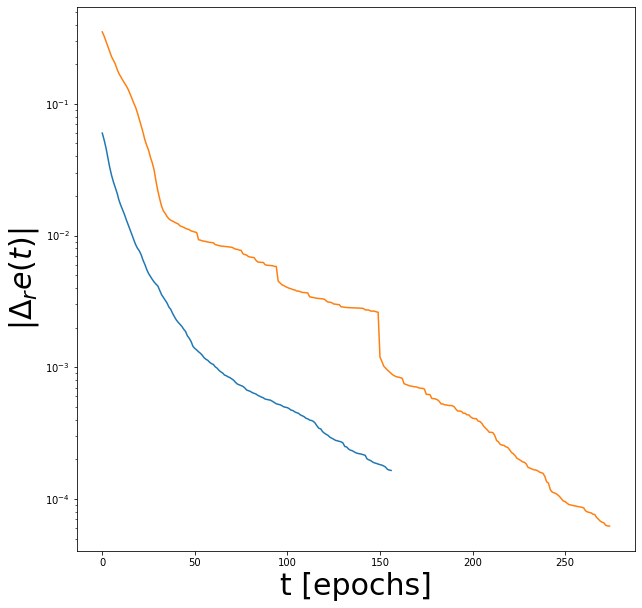

In [32]:
#plt.plot(histories[us[-1]])
plt.figure(figsize=(10,10))
plt.plot(np.abs((np.asarray(histories[us[1]])-egs[1])/egs[1]),label=f'U={us[1]:.2f}')
plt.plot(np.abs((np.asarray(histories[us[-1]])-egs[-1])/egs[-1]),label=f'U={us[-1]:.2f}')
plt.semilogy()
plt.xlabel('t [epochs]',fontsize=30)
plt.ylabel(r'$|\Delta_r e (t)|$',fontsize=30)
plt.tick_params()
plt.show()
